# QUESTION 4

# Image Caption Generator Using Deep Learning on Flickr8K Dataset

The Image Caption Generator is a deep learning project that aims to generate descriptive captions for images using the Flickr8K dataset. This project leverages Convolutional Neural Networks (CNN) for image feature extraction and Recurrent Neural Networks (RNN) with Long Short-Term Memory (LSTM) units for generating sequences of words. The Flickr8K dataset, which consists of 8,000 images each paired with five different captions, is used to train the model. The process involves preprocessing images and captions, creating embeddings, and training the model to map image features to natural language descriptions. This results in a model capable of generating accurate and contextually relevant captions for new images.

In [1]:
import pandas as pd
import numpy as np
import re
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.applications.resnet50 import ResNet50,preprocess_input
from keras.models import Model
from keras.layers import *
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

## Read Path and Load Datasets

In [2]:
def Read_text_file(path):
    with open(path) as f:
        caption=f.read()
        f.close()
    return caption

In [3]:
import os

In [4]:
os.listdir('../input/flickr8k/Flickr_Data/Flickr_Data/')

['flickr8ktextfiles', 'Flickr_TextData', 'Images']

In [5]:
captions=Read_text_file('../input/flickr8k/Flickr_Data/Flickr_Data/Flickr_TextData/Flickr8k.token.txt')

## Cleaning the text

In [7]:
# captions
len(captions.split('\n'))

40461

In [8]:
captions=captions.split('\n')[:-1]

In [9]:
len(captions)

40460

In [10]:
a=captions[1000]

In [11]:
a

'1244140539_da4804d828.jpg#0\tA black and brown dog is laying on a white shaggy carpet .'

In [12]:
a=a.split('\t')[0][:-6]

In [13]:
a

'1244140539_da4804d828'

In [14]:
cap_dict={}

In [15]:
for i in captions:
    a,b=i.split('\t')
    a=a[:-6]
    if cap_dict.get(a) is None:
        cap_dict[a]=[]
    cap_dict[a].append(b)

In [16]:
len(cap_dict)

8092

In [17]:
cap_dict[a]

['A man in a pink shirt climbs a rock face',
 'A man is rock climbing high in the air .',
 'A person in a red shirt climbing up a rock face covered in assist handles .',
 'A rock climber in a red shirt .',
 'A rock climber practices on a rock climbing wall .']

In [18]:
# np.save('description_file.npy',cap_dict)

In [19]:
def sentence_cleaning(sentence):
    sentence=sentence.lower()
    sentence=re.sub('[^a-z]+',' ',sentence)
    sentence=sentence.split()
    sentence=[s for s in sentence if len(s)>1]
    sentence=' '.join(sentence)
    return(sentence)

In [20]:
z='A black and brown dog is laying on a @white shaggy carpet having number # 79 .'

In [21]:
sentence_cleaning(z)

'black and brown dog is laying on white shaggy carpet having number'

## Cleaning every sentence of dictionary

In [22]:
for key in cap_dict:
    for j in range(len(cap_dict[key])):
        cap_dict[key][j]=sentence_cleaning(cap_dict[key][j])

In [23]:
cap_dict[a]

['man in pink shirt climbs rock face',
 'man is rock climbing high in the air',
 'person in red shirt climbing up rock face covered in assist handles',
 'rock climber in red shirt',
 'rock climber practices on rock climbing wall']

In [24]:
# np.save('description_file_2.npy',cap_dict)

## Generate the Vocabulary

In [25]:
word_dic={}

In [26]:
for i in cap_dict:
    for j in cap_dict[i]:
        l=j.split()
        for k in l:
            if k not in word_dic:
                word_dic[k]=1
            else:
                word_dic[k]+=1
    

In [27]:
len(word_dic)

8424

In [28]:
len(word_dic)

8424

In [29]:
final_words=[x for x in word_dic if word_dic[x]>10]

In [30]:
len(final_words)

1845

In [31]:
 final_words

['child',
 'in',
 'pink',
 'dress',
 'is',
 'climbing',
 'up',
 'set',
 'of',
 'stairs',
 'an',
 'way',
 'girl',
 'going',
 'into',
 'wooden',
 'building',
 'little',
 'the',
 'to',
 'her',
 'black',
 'dog',
 'and',
 'spotted',
 'are',
 'fighting',
 'tri',
 'colored',
 'playing',
 'with',
 'each',
 'other',
 'on',
 'road',
 'white',
 'brown',
 'spots',
 'staring',
 'at',
 'street',
 'two',
 'dogs',
 'different',
 'looking',
 'pavement',
 'moving',
 'toward',
 'covered',
 'paint',
 'sits',
 'front',
 'painted',
 'rainbow',
 'hands',
 'bowl',
 'sitting',
 'large',
 'small',
 'grass',
 'plays',
 'it',
 'there',
 'pigtails',
 'painting',
 'young',
 'outside',
 'man',
 'lays',
 'bench',
 'while',
 'his',
 'by',
 'him',
 'which',
 'also',
 'tied',
 'sleeping',
 'next',
 'shirtless',
 'lies',
 'park',
 'laying',
 'holding',
 'leash',
 'ground',
 'orange',
 'hat',
 'something',
 'wears',
 'glasses',
 'wearing',
 'beer',
 'can',
 'ears',
 'rope',
 'net',
 'red',
 'climbs',
 'bridge',
 'onto',
 

In [32]:
for i in cap_dict:
    for j in range(len(cap_dict[i])):
        cap_dict[i][j]='startseq '+cap_dict[i][j]+' endseq'

In [33]:
cap_dict[a]

['startseq man in pink shirt climbs rock face endseq',
 'startseq man is rock climbing high in the air endseq',
 'startseq person in red shirt climbing up rock face covered in assist handles endseq',
 'startseq rock climber in red shirt endseq',
 'startseq rock climber practices on rock climbing wall endseq']

In [34]:
with open('../input/flickr8k/Flickr_Data/Flickr_Data/Flickr_TextData/Flickr_8k.trainImages.txt') as f:
    train_img=f.read()

In [35]:
train_img_list=[x.split('.')[0] for x in train_img.split('\n')[:-1]]

In [36]:
train_img_list

['2513260012_03d33305cf',
 '2903617548_d3e38d7f88',
 '3338291921_fe7ae0c8f8',
 '488416045_1c6d903fe0',
 '2644326817_8f45080b87',
 '218342358_1755a9cce1',
 '2501968935_02f2cd8079',
 '2699342860_5288e203ea',
 '2638369467_8fc251595b',
 '2926786902_815a99a154',
 '2851304910_b5721199bc',
 '3423802527_94bd2b23b0',
 '3356369156_074750c6cc',
 '2294598473_40637b5c04',
 '1191338263_a4fa073154',
 '2380765956_6313d8cae3',
 '3197891333_b1b0fd1702',
 '3119887967_271a097464',
 '2276499757_b44dc6f8ce',
 '2506892928_7e79bec613',
 '2187222896_c206d63396',
 '2826769554_85c90864c9',
 '3097196395_ec06075389',
 '3603116579_4a28a932e2',
 '3339263085_6db9fd0981',
 '2532262109_87429a2cae',
 '2076906555_c20dc082db',
 '2502007071_82a8c639cf',
 '3113769557_9edbb8275c',
 '3325974730_3ee192e4ff',
 '1655781989_b15ab4cbff',
 '1662261486_db967930de',
 '2410562803_56ec09f41c',
 '2469498117_b4543e1460',
 '69710415_5c2bfb1058',
 '3414734842_beb543f400',
 '3006217970_90b42e6b27',
 '2192411521_9c7e488c5e',
 '3535879138_928

In [37]:
train_description={}

In [38]:
for i in train_img_list:
    train_description[i]=cap_dict[i]

In [39]:
a

'997722733_0cb5439472'

## Load the image from the dataset

In [40]:
img=image.load_img('../input/flickr8k/Flickr_Data/Flickr_Data/Images/106490881_5a2dd9b7bd.jpg')

In [41]:
img=image.img_to_array(img)

In [42]:
img.shape

(500, 333, 3)

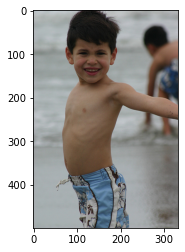

In [43]:
plt.imshow((img/255)*1)

## Creating model 

In [44]:
imagenet="/kaggle/input/new-dataset/resnet50_weights_tf_dim_ordering_tf_kernels.h5"
model=ResNet50(weights=imagenet,input_shape=(224,224,3))

In [45]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [46]:
new_model=Model(model.input,model.layers[-2].output)

In [47]:
def preprocess_img(path):
    img=image.load_img(path,target_size=(224,224,3))
    img=image.img_to_array(img)
    img=img.reshape(1,224,224,3)
    img=preprocess_input(img)#mormalizing the img
    return img

## Extract the feature vector from all images

In [48]:
img=preprocess_img('../input/flickr8k/Flickr_Data/Flickr_Data/Images/106490881_5a2dd9b7bd.jpg')

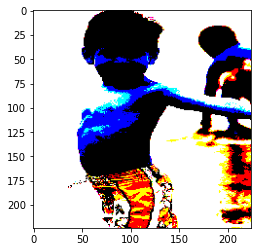

In [49]:
plt.imshow(img[0])

In [50]:
def encode_img(path):
    img=preprocess_img(path)
    feature_vector=new_model.predict(img)
    feature_vector=feature_vector.reshape((-1,))
    return feature_vector
    

In [51]:
train_description['1244140539_da4804d828']

['startseq black and brown dog is laying on white shaggy carpet endseq',
 'startseq brown and black dog is laying on shaggy rug endseq',
 'startseq small brown and black dog lying down in furry rug endseq',
 'startseq small dog is sitting on white carpet endseq',
 'startseq small dog shakes its head on white shag carpet endseq']

## Tokenising the Vocabulary

In [52]:
encoded_img_dic={}
s=0
for i in train_description:
    path='../input/flickr8k/Flickr_Data//Flickr_Data/Images/'+i+'.jpg'
    encoded_img_dic[i]=encode_img(path)
    s+=1
    if s%100==0:
        print(s)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000


In [76]:
np.save('encoded_img_dic.npy',encoded_img_dic)

In [77]:
!ls -l --b=M  ./encoded_img_dic.npy | cut -d " " -f5

48M


## Data preprocessing for captions

In [78]:
s=1
word_to_idx={}
idx_to_word={}
for i in final_words:
    word_to_idx[i]=s
    idx_to_word[s]=i
    s+=1

In [79]:
len(word_to_idx)

1845

In [80]:
idx_to_word[1845]

'cannon'

In [81]:
### Two Special words
word_to_idx['startseq']=1846
word_to_idx['endseq']=1847
idx_to_word[1846]='startseq'
idx_to_word[1847]='endseq'

In [82]:
len(word_to_idx)

1847

In [83]:
vocab_size=len(word_to_idx)+1 # adding one for 0 because that will also in our vector

In [84]:
vocab_size

1848

In [85]:
sen_len=[]
for i in train_description:
    for sen in train_description[i]:
        sen_len.append(len(sen.split()))

In [86]:
len(sen_len)

30000

(array([7.500e+01, 1.356e+03, 2.034e+03, 6.462e+03, 3.884e+03, 6.808e+03,
        4.720e+03, 1.495e+03, 1.766e+03, 4.910e+02, 5.250e+02, 2.240e+02,
        5.300e+01, 6.800e+01, 1.300e+01, 1.800e+01, 6.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 3. ,  4.6,  6.2,  7.8,  9.4, 11. , 12.6, 14.2, 15.8, 17.4, 19. ,
        20.6, 22.2, 23.8, 25.4, 27. , 28.6, 30.2, 31.8, 33.4, 35. ]),
 <a list of 20 Patch objects>)

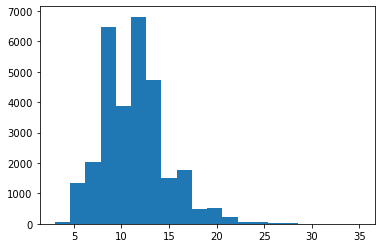

In [87]:
plt.hist(sen_len,bins=20)

In [88]:
sen_len[0]

12

In [89]:
max_len=20

## Custom Data Generator

In [90]:
def data_generator(train_description,vocab_size,word_to_idx,encoded_img_dic,max_len,batch_size):
    X1,X2,y=[],[],[]
    n=0
    while True:
        for key,desc_list in train_description.items():
            n+=1
            encoding_of_photo=encoded_img_dic[key]
            for desc in desc_list:
                seq=[word_to_idx[i] for i in desc.split() if i in word_to_idx]
                for i in range(1,len(seq)):
                    xi=seq[0:i]
                    yi=seq[i]
                    
                    xi=pad_sequences([xi],maxlen=max_len,value=0,padding='post')[0]
                    yi=to_categorical([yi],num_classes=vocab_size)[0]
                    
                    
                    X1.append(encoding_of_photo)
                    X2.append(xi)
                    y.append(yi)
                if n==batch_size:
                    yield [np.array(X1),np.array(X2)],np.array(y)
                    X1,X2,y=[],[],[]
                    n=0
                    
                

## Glove Vector Embeddings

In [91]:
with open('/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.50d.txt',encoding='utf8') as f:
     glove_data=f.read()
len(glove_data)

type(glove_data)

glove_data=glove_data.split('\n')

type(glove_data)

len(glove_data)

glove_data=glove_data[:-1]

len(glove_data)

glove_data[0].split()[0]

embedding_index={}
for line in glove_data:
    line=line.split()
    word=line[0]
    embeding=np.array(line[1:],dtype='float')
    embedding_index[word]=embeding
    

len(embedding_index)

embedding_index['the'].shape

def get_embedding_matrix():
    dim=50
    matrix=np.zeros((vocab_size,dim))
    for word,number in word_to_idx.items():
        embedding_vector=embedding_index.get(word)
        if embedding_vector is not None:
             matrix[word_to_idx[word]]=embedding_vector
    return matrix
    

embedding_matrix=get_embedding_matrix()

len(embedding_matrix)

embedding_matrix[word_to_idx['the']]



array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
       -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
        2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
        1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
       -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
       -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
        4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
        7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
       -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
        1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01])

 Saving and loading a dictionary using numpy

In [92]:
np.save('word_to_idx.npy',word_to_idx)

z=np.load('word_to_idx.npy',allow_pickle=True).item()
type(z)

np.save('embedding_matrix.npy',embedding_matrix)

In [93]:
embedding_matrix=np.load('embedding_matrix.npy')

In [94]:
embedding_matrix[3]

array([-1.7271e-01,  9.5417e-01, -8.4464e-01,  1.1818e-01,  8.7641e-02,
        8.4337e-01, -7.3347e-01, -1.1093e+00, -2.5643e-01,  9.7234e-02,
        1.2908e-02,  1.3701e-01,  7.2675e-01,  3.3118e-01,  2.5684e-01,
       -2.0378e-02, -5.4783e-01, -6.9103e-03, -3.8184e-01, -1.3683e+00,
       -8.0791e-01, -2.2261e-01,  6.6085e-01, -6.9439e-01, -9.7622e-01,
       -2.3337e-01, -1.0628e+00,  2.0045e+00,  4.2777e-01, -1.4457e+00,
        1.6293e+00,  7.3724e-02, -3.5370e-01,  5.5845e-01, -2.8224e-01,
        3.1409e-01,  2.5210e-01, -3.7115e-01, -1.9895e-01, -1.2552e+00,
        1.0809e-01,  8.8290e-02, -4.7171e-01, -7.0476e-01,  8.4641e-01,
       -4.3109e-01,  1.9027e-03, -1.7140e+00, -1.1932e-01, -5.1271e-01])

 Model Architecture

In [95]:
encoded_img_dic['1244140539_da4804d828'].shape

(2048,)

## Defining the Model

In [96]:
# For images
input_img_features=Input(shape=(2048,))
inp_img1=Dropout(0.3)(input_img_features)
inp_img2=Dense(256,activation='relu')(inp_img1)


In [97]:
vocab_size

1848

In [98]:
input_captions=Input(shape=(max_len,))
inp_cap1=Embedding(input_dim=vocab_size,output_dim=50,mask_zero=True)(input_captions)
inp_cap2=Dropout(0.3)(inp_cap1)
inp_cap3=LSTM(256)(inp_cap2)

In [99]:
decoder1=add([inp_img2,inp_cap3])
decoder2=Dense(256,activation='relu')(decoder1)
outputs=Dense(vocab_size,activation='softmax')(decoder2)

In [100]:
actual_model=Model(inputs=[input_img_features,input_captions],outputs=outputs)


In [101]:
actual_model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 20)]         0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 2048)]       0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 20, 50)       92400       input_5[0][0]                    
__________________________________________________________________________________________________
dropout_2 (Dropout)             (None, 2048)         0           input_4[0][0]                    
_______________________________________________________________________________________

In [102]:
actual_model.layers[2].output

<tf.Tensor 'embedding_1/embedding_lookup/Identity_1:0' shape=(None, 20, 50) dtype=float32>

In [103]:
actual_model.layers[2].set_weights([embedding_matrix])
actual_model.layers[2].trainable=False

In [104]:
actual_model.compile(loss='categorical_crossentropy',optimizer='adam')

## Training the Model

In [105]:
epochs=5
batch_size=2
steps=len(train_description)//batch_size

In [106]:
def train():
    for i in range(epochs):
        generator=data_generator(train_description,vocab_size,word_to_idx,encoded_img_dic,max_len,batch_size)
        actual_model.fit_generator(generator,epochs=1,steps_per_epoch=steps,verbose=1)
        actual_model.save('./Models/model'+str(i)+'.h5')
        

In [107]:
os.mkdir('Models')

In [108]:
train()

3000/3000 [==============================] - 274s 91ms/step - loss: 3.1051


In [109]:
max_len

20

## Predicting the output

In [110]:
def predict_caption(img):
    img=img.reshape(1,224,224,3)
    img=preprocess_input(img)
    feature_vector=new_model.predict(img)
    feature_vector=feature_vector.reshape((1,2048,1))
    in_text='startseq'
    for i in range(max_len):
        seq=[word_to_idx[w] for w in in_text.split() if w in word_to_idx]
        seq=pad_sequences([seq],maxlen=max_len,padding='post')
        y_pred=actual_model.predict([feature_vector,seq])
        y_pred=y_pred.argmax()
        word=idx_to_word[y_pred]
        in_text+=' '+word
        
        if word=='endseq':
            break
    final_caption=in_text.split()[1:-1]
    final_caption=' '.join(final_caption)
    return final_caption

In [111]:
img=image.load_img('../input/flickr8k/Flickr_Data/Flickr_Data/Images/1007320043_627395c3d8.jpg',target_size=(224,224,3))
img=image.img_to_array(img)

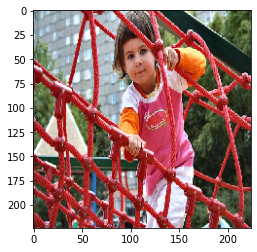

In [112]:
plt.imshow(img/255)

In [113]:
predict_caption(img)

'boy in red shirt is playing with toy'

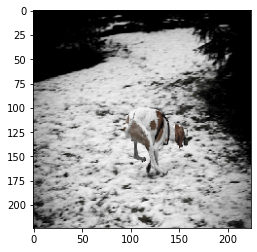

dog is standing in the sand


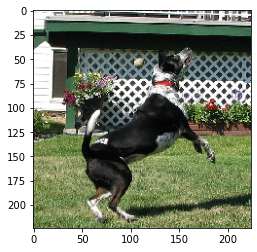

black and white dog is jumping over white dog


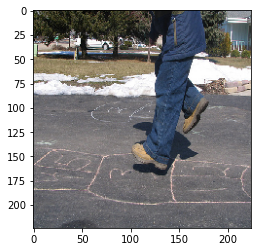

boy in red shirt is jumping off of swing


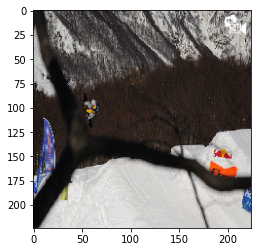

man in red shirt is jumping off the slope


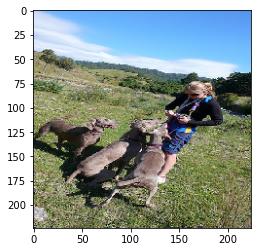

man is jumping up rock wall


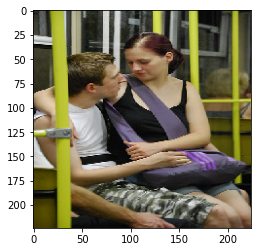

two people are sitting on bench with their hands on the ground


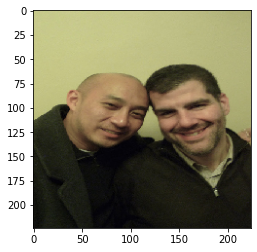

man and woman are sitting on the bed


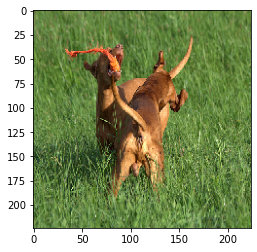

brown dog runs through the grass


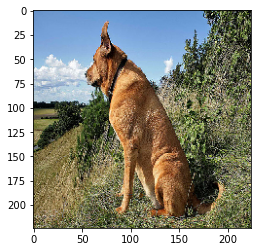

brown dog is running on the grass


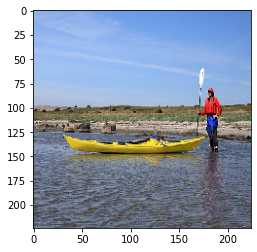

group of people are playing in the water


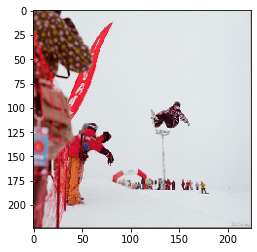

the man is wearing red helmet and is riding bike


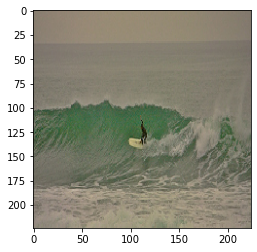

surfer is jumping off the wave


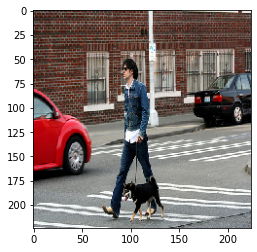

two people are walking down the street


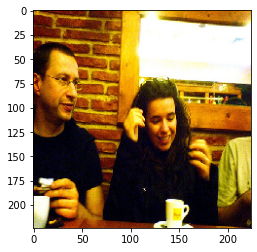

man and woman are sitting on the floor


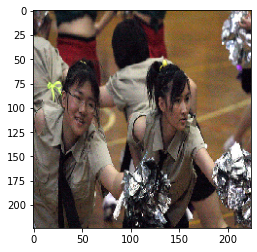

two men in red shirts and white shirts are standing in front of crowd


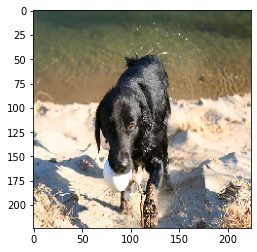

black dog is running through the water


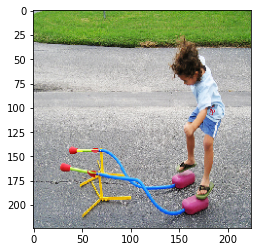

little girl in pink shirt and white shorts is running on the grass


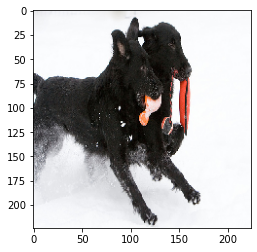

black and white dog is running on the beach


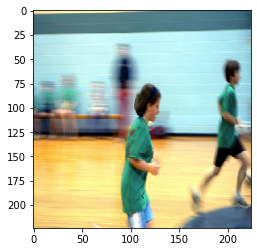

two men in black and white uniforms are playing soccer


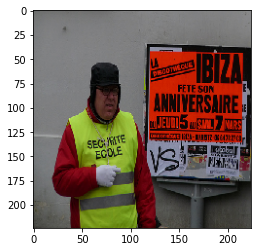

man in black shirt and black shirt is standing in front of building


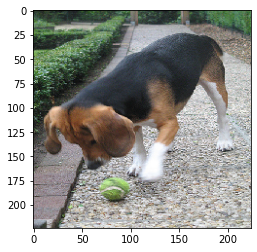

dog is standing on its hind legs


In [114]:
x=0
for i in os.listdir('../input/flickr8k/Flickr_Data/Flickr_Data/Images/'):
    i='../input/flickr8k/Flickr_Data/Flickr_Data/Images/'+i
    img=image.load_img(i,target_size=(224,224,3))
    img=image.img_to_array(img)
    plt.imshow(img/255)
    plt.show()
    print(predict_caption(img))
    x+=1
    if x>20:
        break
    